# AVATAR: THE LAST AIRBENDER ANALYSIS


### This Mini Notebook Analyzes The Script of Avatar: The Last Airbender to Determine a Few Things Including:
* Which season was ranked the best?
* Who was the best director?
* Which character that the most lines?
* What were the main characters favourite words?
* And some other fun facts!

![maincharacters](https://theinquisitiveloon.files.wordpress.com/2013/04/avatar-the-last-airbender-poster.jpg?w=323&h=501)

In [11]:
#set up notebook by importing all relevant libraries
import pandas as pd
import string
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']= 300
%matplotlib inline
import seaborn as sns


In [12]:
#load relevant data files: taken from: https://www.kaggle.com/ekrembayar/avatar-the-last-air-bender
avatar_data = pd.read_csv("./avatar.csv",index_col="id",encoding='windows-1252')


In [13]:
#clean up some data....
avatar_data = avatar_data.drop(['Unnamed: 0'], axis=1) #drop unnamed row....
avatar_data = avatar_data.rename(columns={'character_words':'line'})
avatar_data = avatar_data.dropna(subset=['line']) #removes all
null_data = avatar_data[avatar_data.isnull().any(axis=1)]
null_data #the rating for episode 20 of book 1 is null, repplace it
avatar_data.loc[avatar_data.imdb_rating.isnull(),'imdb_rating'] = 9.7

In [14]:
#add some rows
def episode_num(row):
    if(row.book_num==1):
        return row.chapter_num
    elif(row.book_num==2):
        return 20 + row.chapter_num
    elif(row.book_num==3):
        return 40 + row.chapter_num
avatar_data['episode_num'] = avatar_data.apply(episode_num,axis=1)


Text(0.5, 0.98, 'IMDB Rating of Avatar: The Last Airbender Episodes')

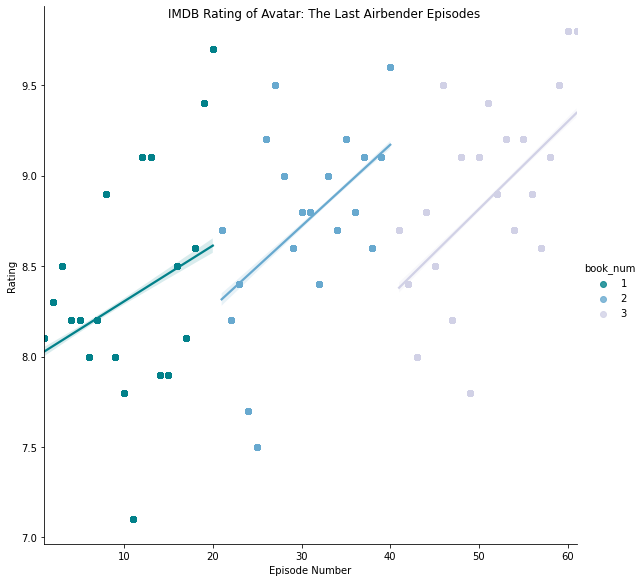

In [15]:
#get rating for each season....
rating_graph = sns.lmplot(data=avatar_data, x="episode_num", y="imdb_rating", hue="book_num", palette="PuBuGn_r",height=8)
rating_graph = rating_graph.set_axis_labels("Episode Number", "Rating")
fig = rating_graph.fig;
fig.suptitle("IMDB Rating of Avatar: The Last Airbender Episodes")

### Which Season Was the Best?

Unsprisingly, all 3 seasons of avatar performed very well (with the lowest rating being above 7). However the series recieved more praise as it went on, and *the 3rd season* was the highest rated!

Not only that, this shows that the episodes were better as the season progressed, a trend in all 3 seasons!
![season3](https://thumbnails.cbsig.net/_x/w400/CBS_Production_Entertainment_VMS/2020/06/06/1747384387587/NICKELODEON_AVATAR_302_204724_1920x1080.jpg)



Text(0, 0.5, 'Frequency')

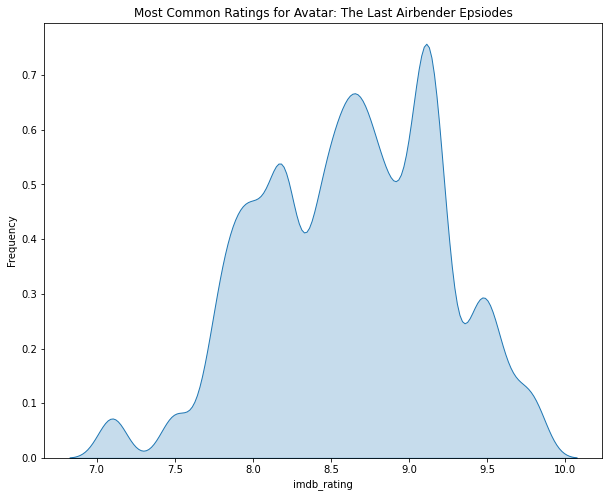

In [16]:
#most commmon rating

plt.figure(figsize=(10,8))
g = sns.kdeplot(data=avatar_data['imdb_rating'], shade=True,palette="Purple") #smoothened historgram
plt.title("Most Common Ratings for Avatar: The Last Airbender Epsiodes")
g.set_ylabel('Frequency')

### What Ratings were the most common?
Through this graph, we can see that ATLA recieved mostly ratings between 9.0-9.5 during its run!

Text(0.5, 0, 'rating')

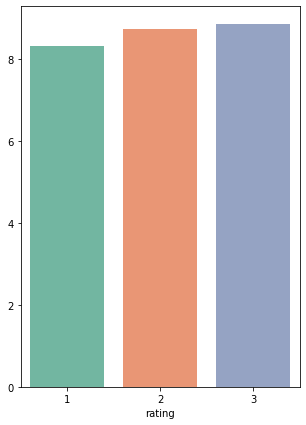

In [17]:
avg_rating=[]
for i in range(1,4):
    avg_rating.append(avatar_data.loc[avatar_data.book_num==i].imdb_rating.mean())
avg_rating
plt.figure(figsize=(5,7))
ax = sns.barplot(y=avg_rating,x=[1,2,3],dodge=False,palette="Set2")
ax.set_xlabel('rating')

Text(0.5, 1.0, 'Avatar:The Last AirBender Ratings By Director')

<Figure size 864x504 with 0 Axes>

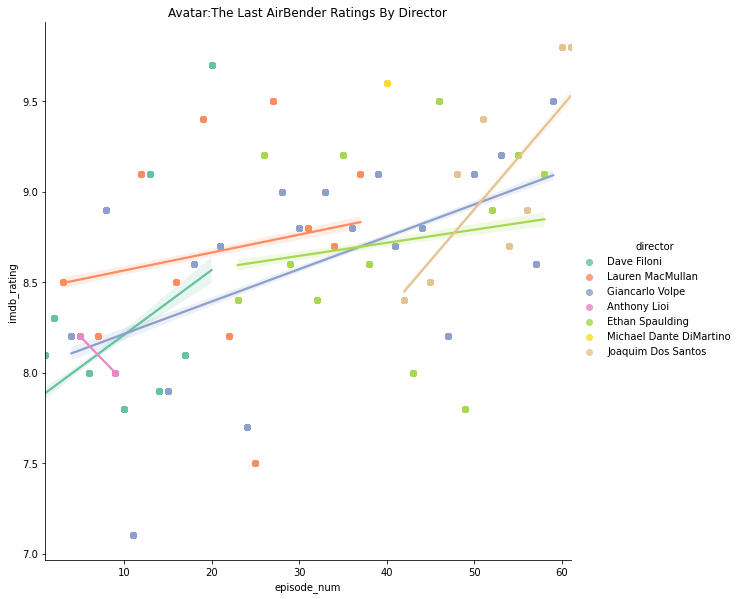

In [18]:

plt.figure(figsize=(12,7))
sns.lmplot(data=avatar_data, x="episode_num", y="imdb_rating", hue="director", palette="Set2",height=8)
plt.title("Avatar:The Last AirBender Ratings By Director")
#sns.scatterplot(y=avatar_data["imdb_rating"], x=avatar_data["director"])

### What Ratings were the most common?

As we can see, almost all show's directors improved as the show went on with the most improvements from
* 


### Who had the Most Lines?

In this section we analze which characters had the most lines in the show with the following conditions:
* entire series
* Book 1
* Book 2
* Book 3

Text(0.5, 1.0, 'Avatar:The Last AirBender Line Count of Character')

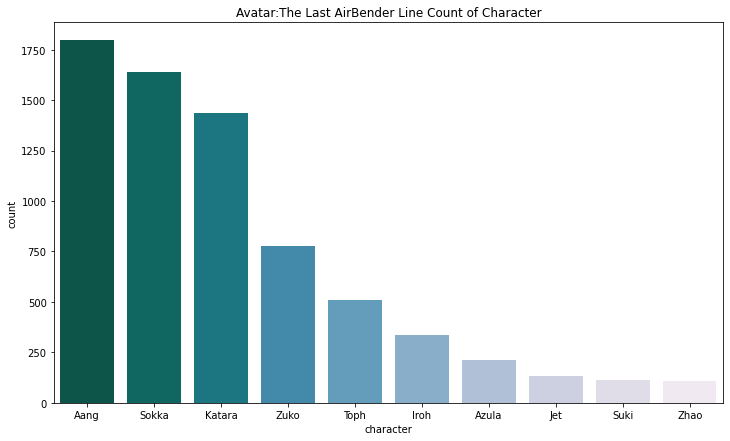

In [19]:
#which character that the most lines?

plt.figure(figsize=(12,7))
sns.countplot(data=avatar_data,x="character", order=avatar_data.character.value_counts().iloc[:10].index, palette="PuBuGn_r")
plt.title("Avatar:The Last AirBender Line Count of Character")

In [20]:
#sns.swarmplot(y=avatar_data["imdb_rating"], x=avatar_data["director"])

Text(0.5, 1.0, 'Avatar:The Last AirBender Line Count of Character (Book 1)')

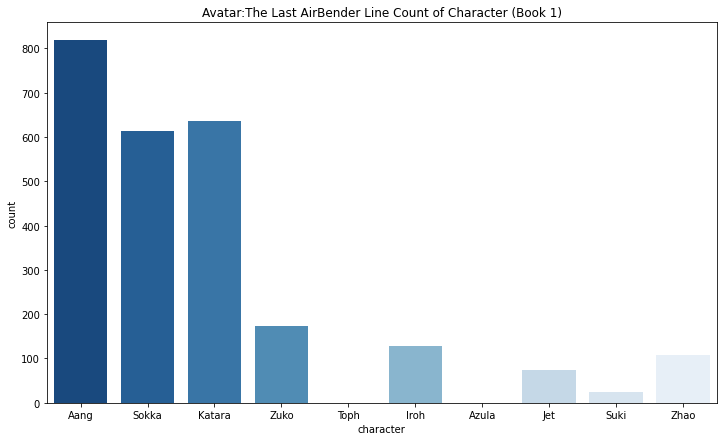

In [21]:

plt.figure(figsize=(12,7))
sns.countplot(data=avatar_data.loc[avatar_data.book_num==1],x="character", order=avatar_data.character.value_counts().iloc[:10].index, palette="Blues_r")
plt.title("Avatar:The Last AirBender Line Count of Character (Book 1)")

Text(0.5, 1.0, 'Avatar:The Last AirBender Line Count of Character (Book 2)')

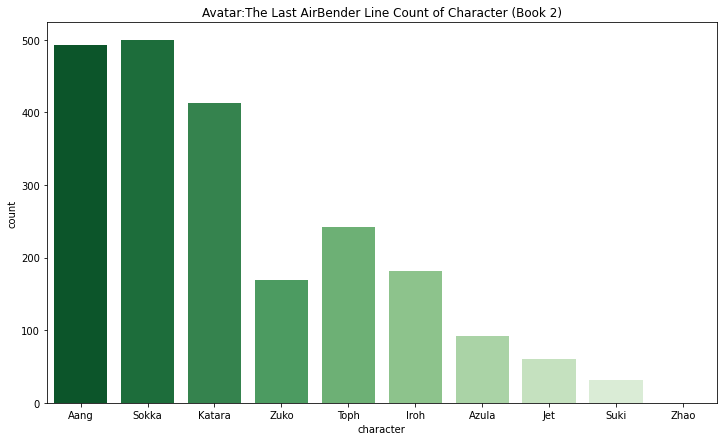

In [22]:

plt.figure(figsize=(12,7))
sns.countplot(data=avatar_data.loc[avatar_data.book_num==2],x="character", order=avatar_data.character.value_counts().iloc[:10].index, palette="Greens_r")
plt.title("Avatar:The Last AirBender Line Count of Character (Book 2)")

Text(0.5, 1.0, 'Avatar:The Last AirBender Line Count of Character (Book 3)')

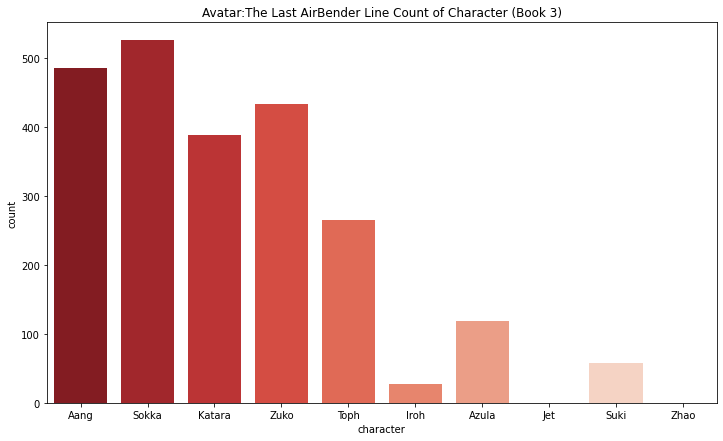

In [23]:
plt.figure(figsize=(12,7))
sns.countplot(data=avatar_data.loc[avatar_data.book_num==3],x="character", order=avatar_data.character.value_counts().iloc[:10].index, palette="Reds_r")
plt.title("Avatar:The Last AirBender Line Count of Character (Book 3)")

### Some Conclusions:

Unsprisingly Aang had the most lines in the series. However, there were a few suprises:
   * in book two, Sokka has the most lines, passing both Aang and Katara
   * In book three, Zuko has the 3rd most lines, overating the original trio. This was a pivotal book for Zuko where he finally made the switch to join team Avatar. 
   * While Zhao had no presence in book two or three, he still managed to crack the top 10 of most lines in the series.
   
   ![sokka and zuko](https://vignette.wikia.nocookie.net/shipping/images/d/df/Zukka18_%28The_Boiling_Rock%2C_Part_1%29.jpg/revision/latest?cb=20200603022616)
    

### What Were The Gaang's Favourite Words?

This section analyzes the favourite words of our main characters (the Gaang) over the course of show

*Note: in this section stopwords (along with a few other words without much meaning were ignored)*

In [24]:
#set up relevant functions
import nltk
from nltk.corpus import stopwords
def most_common_elements (list,):
    line_series=[]
    for element in list:
        line_series.append([element, list.count(element)])
    return line_series

#favourite works of main characters
def get_most_common_word(key,value,color):
    lines = avatar_data.loc[avatar_data[key]==value].line.str.lower().str.translate(str.maketrans('', '', '!"#$%&()*+,-./:;<=>?@[\]^_`{|}~')).str.split(" ")
    lines_array=[]#get all lines....
    for value in lines:
        lines_array = lines_array + value
    line_series= most_common_elements(lines_array)
    character_lines = pd.DataFrame( line_series, columns=['Word','Count'])
    character_lines = character_lines.drop_duplicates(subset=None,keep="first")
    character_lines.set_index("Word",inplace=True, drop=True)
    en_stops = stopwords.words('english')
    en_stops = en_stops + ["i'm","","can't","that's","go","get","see","we're","like","going","i've","know","got"]
    character_lines = character_lines.drop(en_stops,errors='ignore')
    word_series= character_lines.nlargest(10, 'Count')
   
    g = sns.barplot(x=word_series.Count,y=word_series.index,orient="h", palette=color)
    g.set_xlabel("Number of Times Repeated")
   



Text(0.5, 1.0, "Aang's Favourite Words")

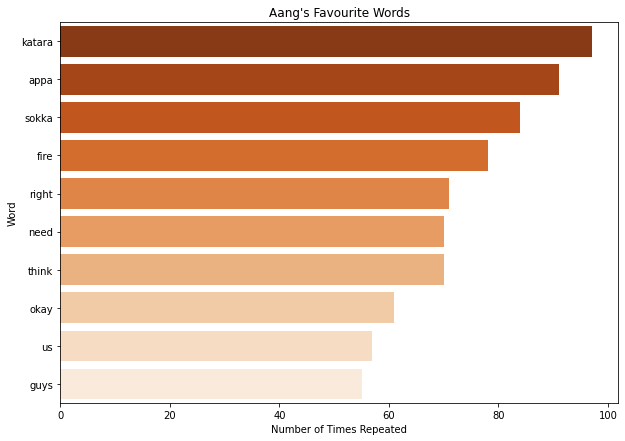

In [25]:
plt.figure(figsize=(10,7))

get_most_common_word("character","Aang","Oranges_r")
plt.title("Aang's Favourite Words")

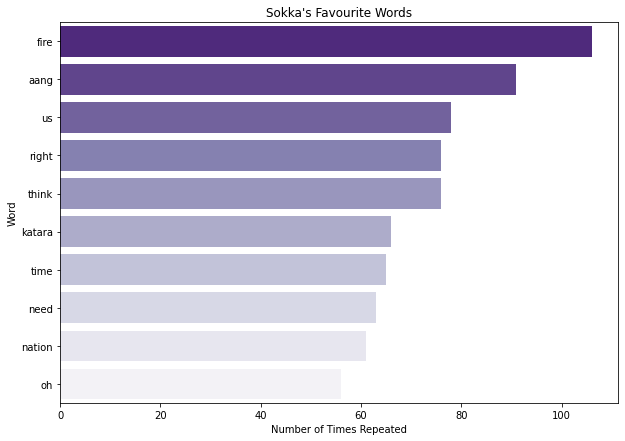

In [26]:
plt.figure(figsize=(10,7))
plt.title("Sokka's Favourite Words")
get_most_common_word("character","Sokka","Purples_r")

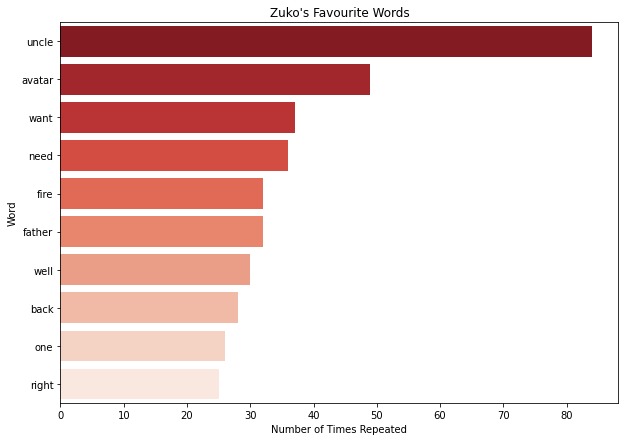

In [27]:
plt.figure(figsize=(10,7))
plt.title("Zuko's Favourite Words")
get_most_common_word("character","Zuko","Reds_r")

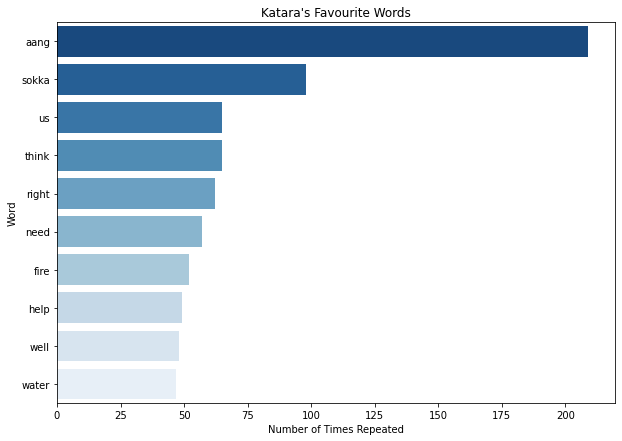

In [28]:
plt.figure(figsize=(10,7))
plt.title("Katara's Favourite Words")
sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)
get_most_common_word("character","Katara","Blues_r")

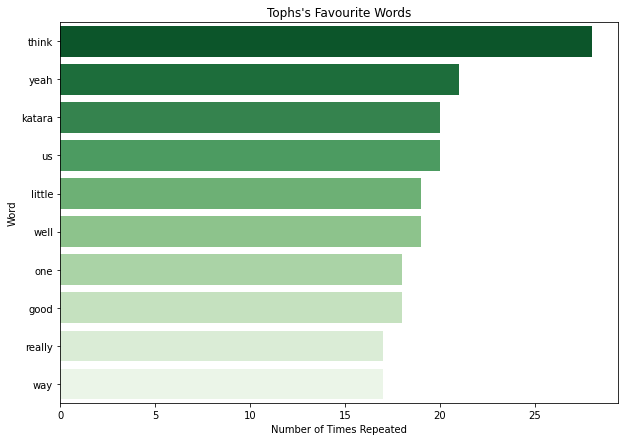

In [29]:
plt.figure(figsize=(10,7))
plt.title("Tophs's Favourite Words")
get_most_common_word("character","Toph","Greens_r")

### Some Conclusions

This section revealed some very sweet pieces of information including:
* Katara and Aang have said each other's name throughout the series
* Zuko's favourite word was uncle (aww...)
* Sokka favourite word (very suprisingly...) was fire
* And Toph's favourite word in the entire series was think

### What Were the Most Repeated Words in Each Book?
* This section looks at what the most repeated word is, but focuses' on each book (season)

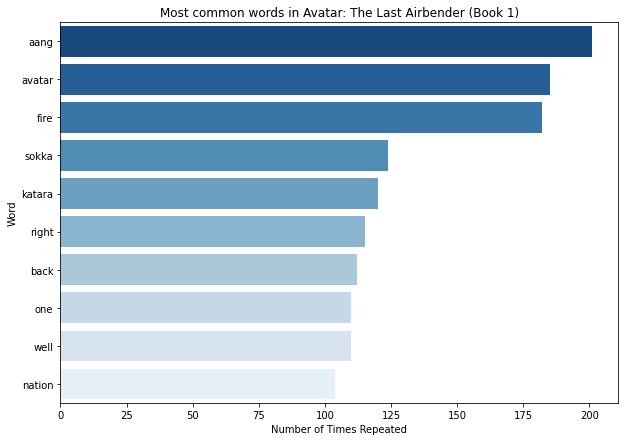

In [30]:
#get most common word by book
plt.figure(figsize=(10,7))
plt.title("Most common words in Avatar: The Last Airbender (Book 1)")
get_most_common_word("book","Water","Blues_r")

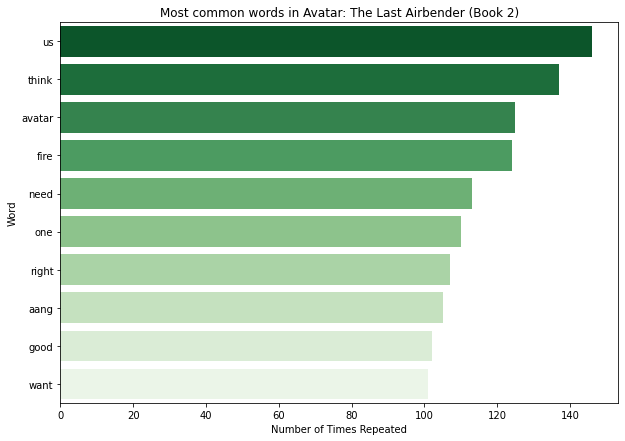

In [31]:
plt.figure(figsize=(10,7))
plt.title("Most common words in Avatar: The Last Airbender (Book 2)")
get_most_common_word("book","Earth","Greens_r")

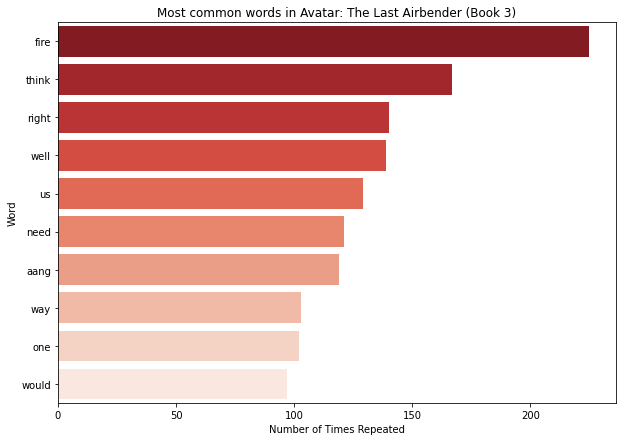

In [32]:
plt.figure(figsize=(10,7))
plt.title("Most common words in Avatar: The Last Airbender (Book 3)")
get_most_common_word("book","Fire","Reds_r")

### Some Conclusions:

This section was relatively interesting as well
* Aang being the avatar was a very prominent plot point in the first season, hence "Avatar" being a top word. However, as the show went on that was repeated less and less, along with Aang's name
* Book 2's most repeated word was us, and this is very fitting as Team Avatar not only grew in size, but in friendship over this season as well!
* Unsprisingly, book 3's main word was fire!

Text(0.5, 1.0, 'Most Popular Element in Avatar: The Last Airbender')

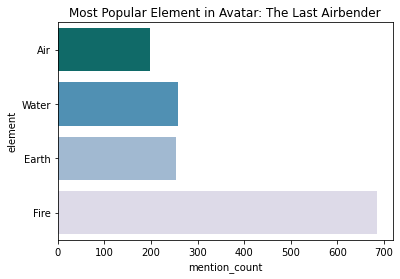

In [33]:
#popularity of the kingdoms....
my_list=[]
for element in ["Air","Water","Earth","Fire"]:
    count = avatar_data.line.map(lambda p: p.count(element) + p.count(element.lower())).sum()
    my_list=my_list + [[element,count]]
element_mention = pd.DataFrame(my_list, columns=["element","mention_count"]);
sns.barplot(y=element_mention.element,x=element_mention.mention_count,orient="h",palette="PuBuGn_r")
plt.title("Most Popular Element in Avatar: The Last Airbender")

### So Which Element Ruled?
* Fire was by far the most mentioned element during the course of the show. This isn't very suprising as most of the show focused on defeating the fire nation.
* Water and Earth were the next most popular, and it ranked over Air as there were two books which focused on each element (and its tribes/kingdoms) respectively

![element](https://i.pinimg.com/originals/e9/39/5b/e9395bd0c52312f4a4fcdd330e9b3279.jpg)

In [34]:
#running gags...
#data= avatar_data.loc[avatar_data.character=="Zuko"].line.apply(lambda p: p.count("Honor") + p.count("honor"))
#sns.kdeplot(data=avatar_data.character)

In [35]:
#data = avatar_data.loc[avatar_data.character=="Iroh"].line.map(lambda p: p.count("Tea") + p.count("tea"))


In [36]:
#avatar_data.loc[avatar_data.character=="Cabbage merchant"].line.map(lambda p: p.count("cabbage") + p.count("Cabbage")).sum()